In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Kelly = ['#af2337', '#ecc342', '#2967a0', '#2f3c28', '#96b437',
#          '#da93ab', '#e58932', '#80598f', '#7e331f', '#3b855a',
#          '#c0b286', '#a9c9ed', '#ec977f', '#848482', '#604628',
#          '#d26034', '#a64c6b', '#dbd245', '#eba83b', '#5d5092',
#          '#222222', '#f2f3f4']

In [2]:
# make some adjustment of the plotting

mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'EAEAF2'
mpl.rcParams['axes.titlesize'] = 19
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['legend.markerscale'] = 1
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['figure.dpi'] = 100

In [3]:
# load the genotype data
phase3_genotype = pd.read_csv('1kg_phase3_MGI358_genotype_matrix.tsv', sep = '\t', index_col = 0)

# load the metadata
# there are some emtpy columns at the end of each line, that's why usecols=[0,1,2,3]
phase3_info = pd.read_csv('1kg_phase3_release_20130502_vcf/integrated_call_samples_v3.20130502.ALL.panel',
                           sep = '\t', index_col = 0, usecols=[0,1,2,3])

# make sure the orders of samples are the same between sample_genotype and sample_info
phase3_info = phase3_info.loc[phase3_genotype.columns, :]

In [4]:
phase3_genotype.head(2)

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00105,HG00106,HG00107,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
ID,,,,,,,,,,,,,,,,,,,,,
rs826472,2,2,0,1,0,2,0,1,2,1,...,2,2,1,2,2,2,2,1,2,1
rs735155,0,2,0,0,0,2,1,0,0,2,...,1,2,2,2,1,2,2,2,2,0


In [5]:
phase3_info.head(2)

,pop,super_pop,gender
HG00096,GBR,EUR,male
HG00097,GBR,EUR,female


In [6]:
# The data in our matrix is limited to 0,1,2 which are fairly close
# so we don't really need to scale them
# note all scikit-learn packakges assume you have sample by feature matrix, hence sample_genotype.T

pca = PCA(n_components=2)
pca.fit(phase3_genotype.T)
X_r = pca.transform(phase3_genotype.T)
phase3_info['PC1'] = X_r[:, 0]
phase3_info['PC2'] = X_r[:, 1]

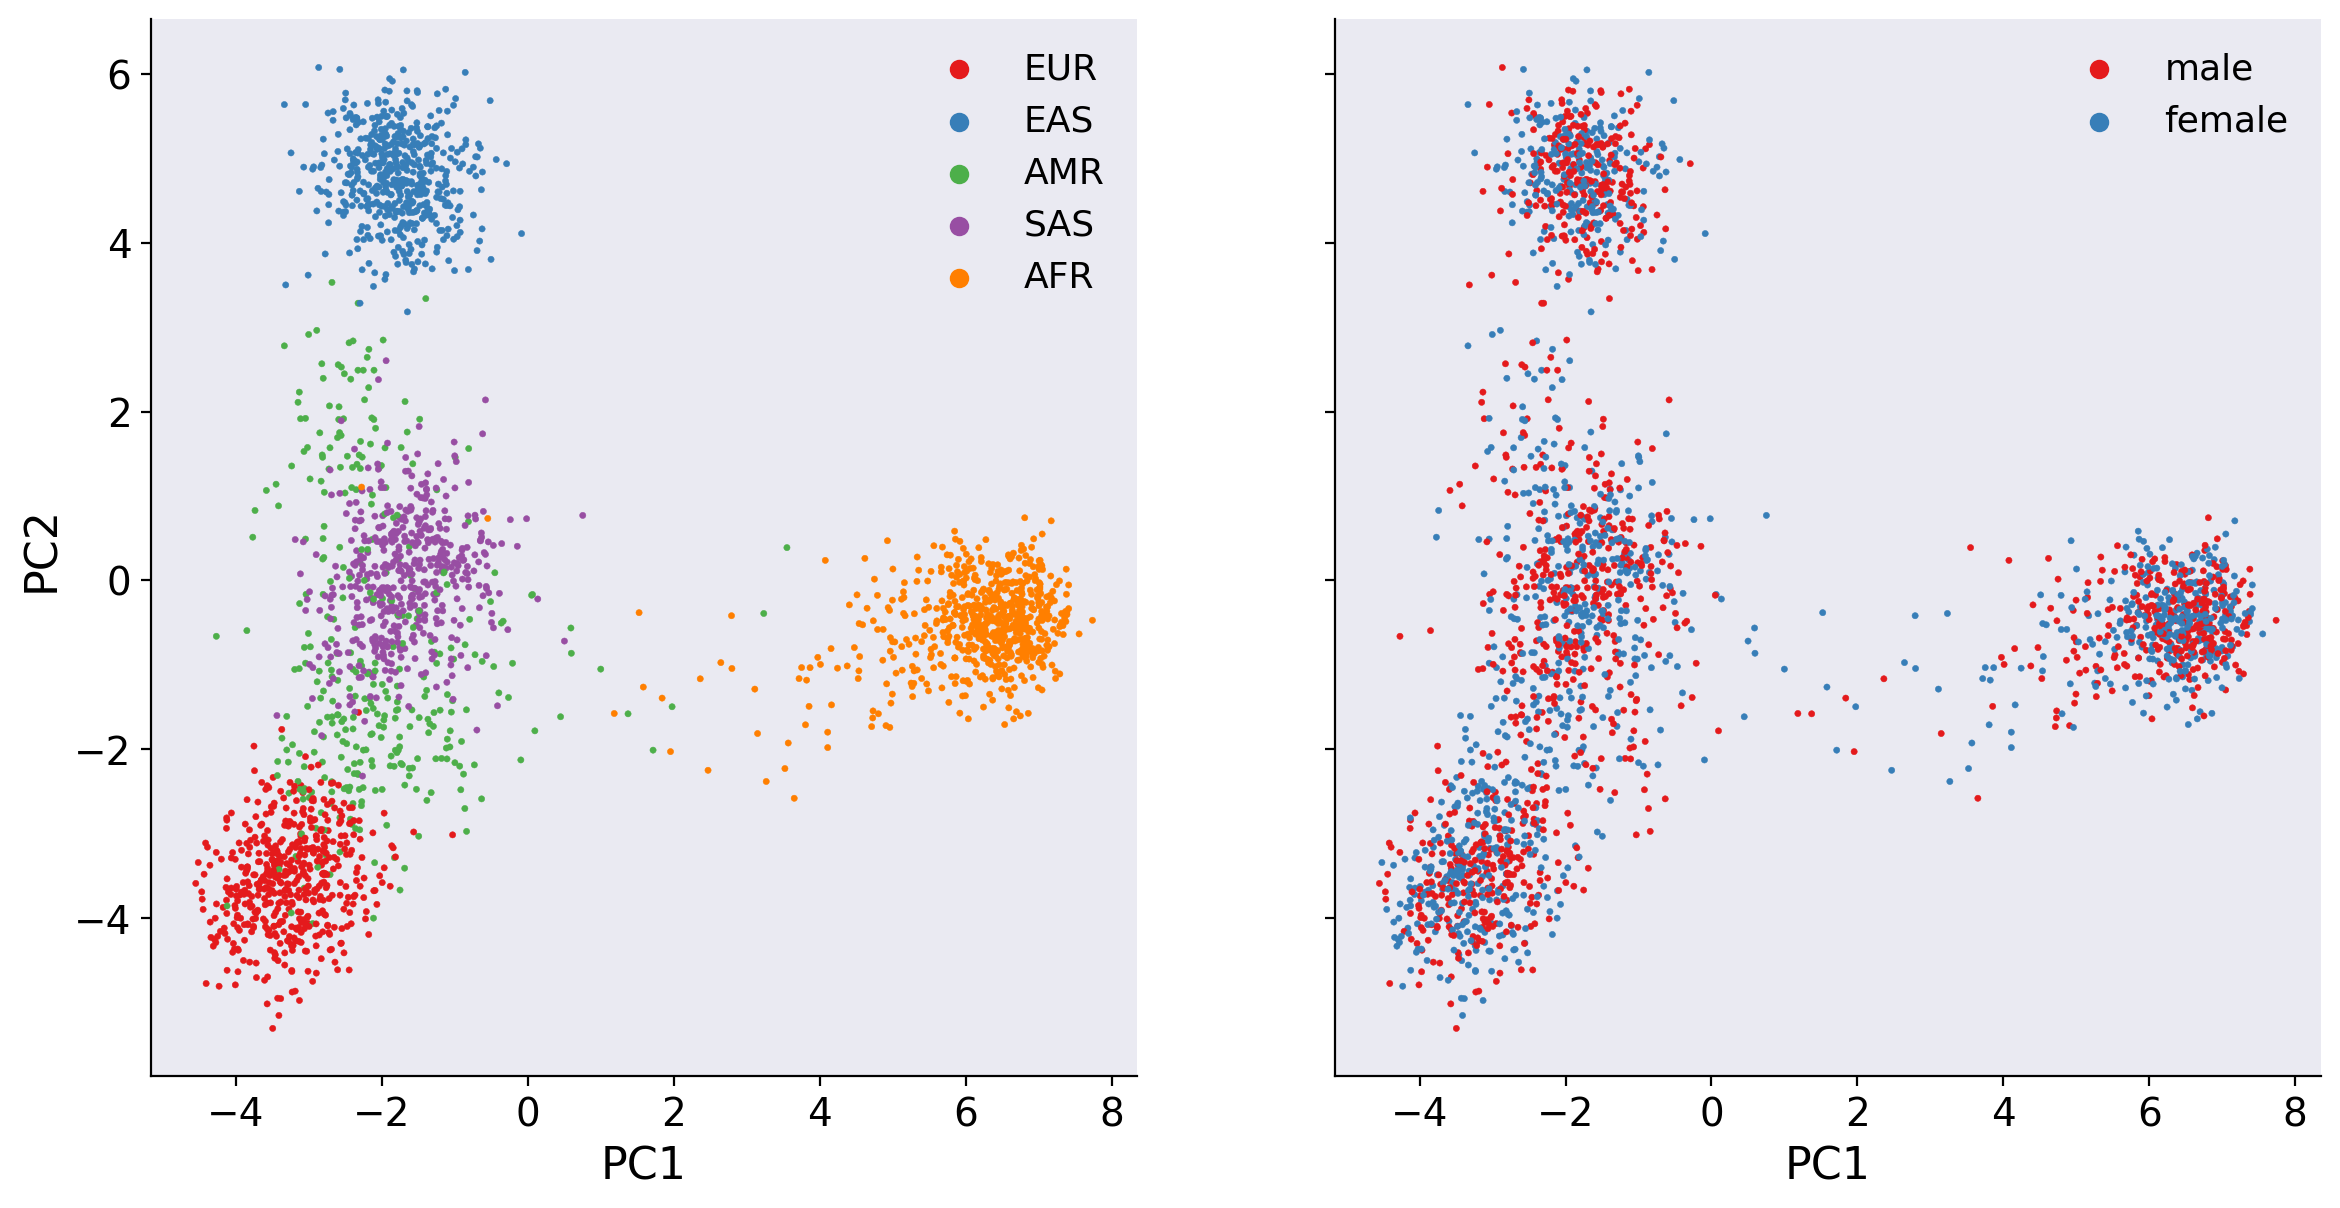

In [7]:
fig, axs = plt.subplots(figsize = (14,7), ncols=2, sharex=True, sharey=True)

sns.scatterplot(data = phase3_info, x = 'PC1', y = 'PC2', hue = 'super_pop',
                edgecolor = None, palette = 'Set1', s = 5, ax = axs[0])
sns.scatterplot(data = phase3_info, x = 'PC1', y = 'PC2', hue = 'gender',
                edgecolor = None, palette = 'Set1', s = 5, ax = axs[1])

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(title='', frameon = False)

plt.savefig('PCA_by_superpop_gender.pdf', bbox_inches = 'tight')

In [8]:
# now let's have a look at the loading of each feature on PC1
# sort them (smallest to largest)

# the result indicates that the 67th feature contributes the most to the negative side (non-AFR)
# the 78th feature contributes the most to the positive side (AFR)

pca.components_[0, :].argsort()

array([ 67,  68, 122,  61,  76, 185, 109,  25,  22,  47,  34, 155,  26,
        73, 177, 115,  30,   3, 156,  33,  50, 113, 144,  52,  41, 112,
         1, 166, 117,   8,  23, 116, 120, 119, 192,  85,  81,  55,  14,
        77,  97,  18, 105,  88, 165,  82,  38, 160, 142, 108,  10, 182,
        65,  15,  80, 152,  31,  59, 153, 179,   5, 136,  48, 134, 197,
       189,  69,  39,  11,  53, 131, 132, 162, 146, 183,  21, 118, 130,
        12, 173,  74, 172,  46, 129,  51, 104, 188,  87,  64, 114,  98,
         7,  28,  43,  17,  42, 164,  72, 198,  49,  16,  40,  20,  37,
        32, 110,  79,  13, 184,  60, 123,  89,  94, 127,  86, 181,  71,
        75,  63,  57,  56, 167, 170, 100, 171, 149, 126, 154,   4,   6,
        90, 135, 141, 174,   2, 163, 194, 176, 169, 148,  84, 193, 133,
       150,  62, 111,  66, 161,  24,  54, 102, 128,  35, 138, 157, 159,
       151,  91,  83, 158,  70, 145,   0, 125, 101,  29, 140, 139, 195,
       137,  36, 121, 180, 103, 106, 124, 187, 178,   9, 191, 14

In [9]:
# look at what are they

print(phase3_genotype.index[67])
print(phase3_genotype.index[78])

rs3916235
rs2814778


In [10]:
# add the value to the sample_info so that we could plot them

phase3_info['rs3916235'] = phase3_genotype.loc['rs3916235',].astype(str)
phase3_info['rs2814778'] = phase3_genotype.loc['rs2814778',].astype(str)

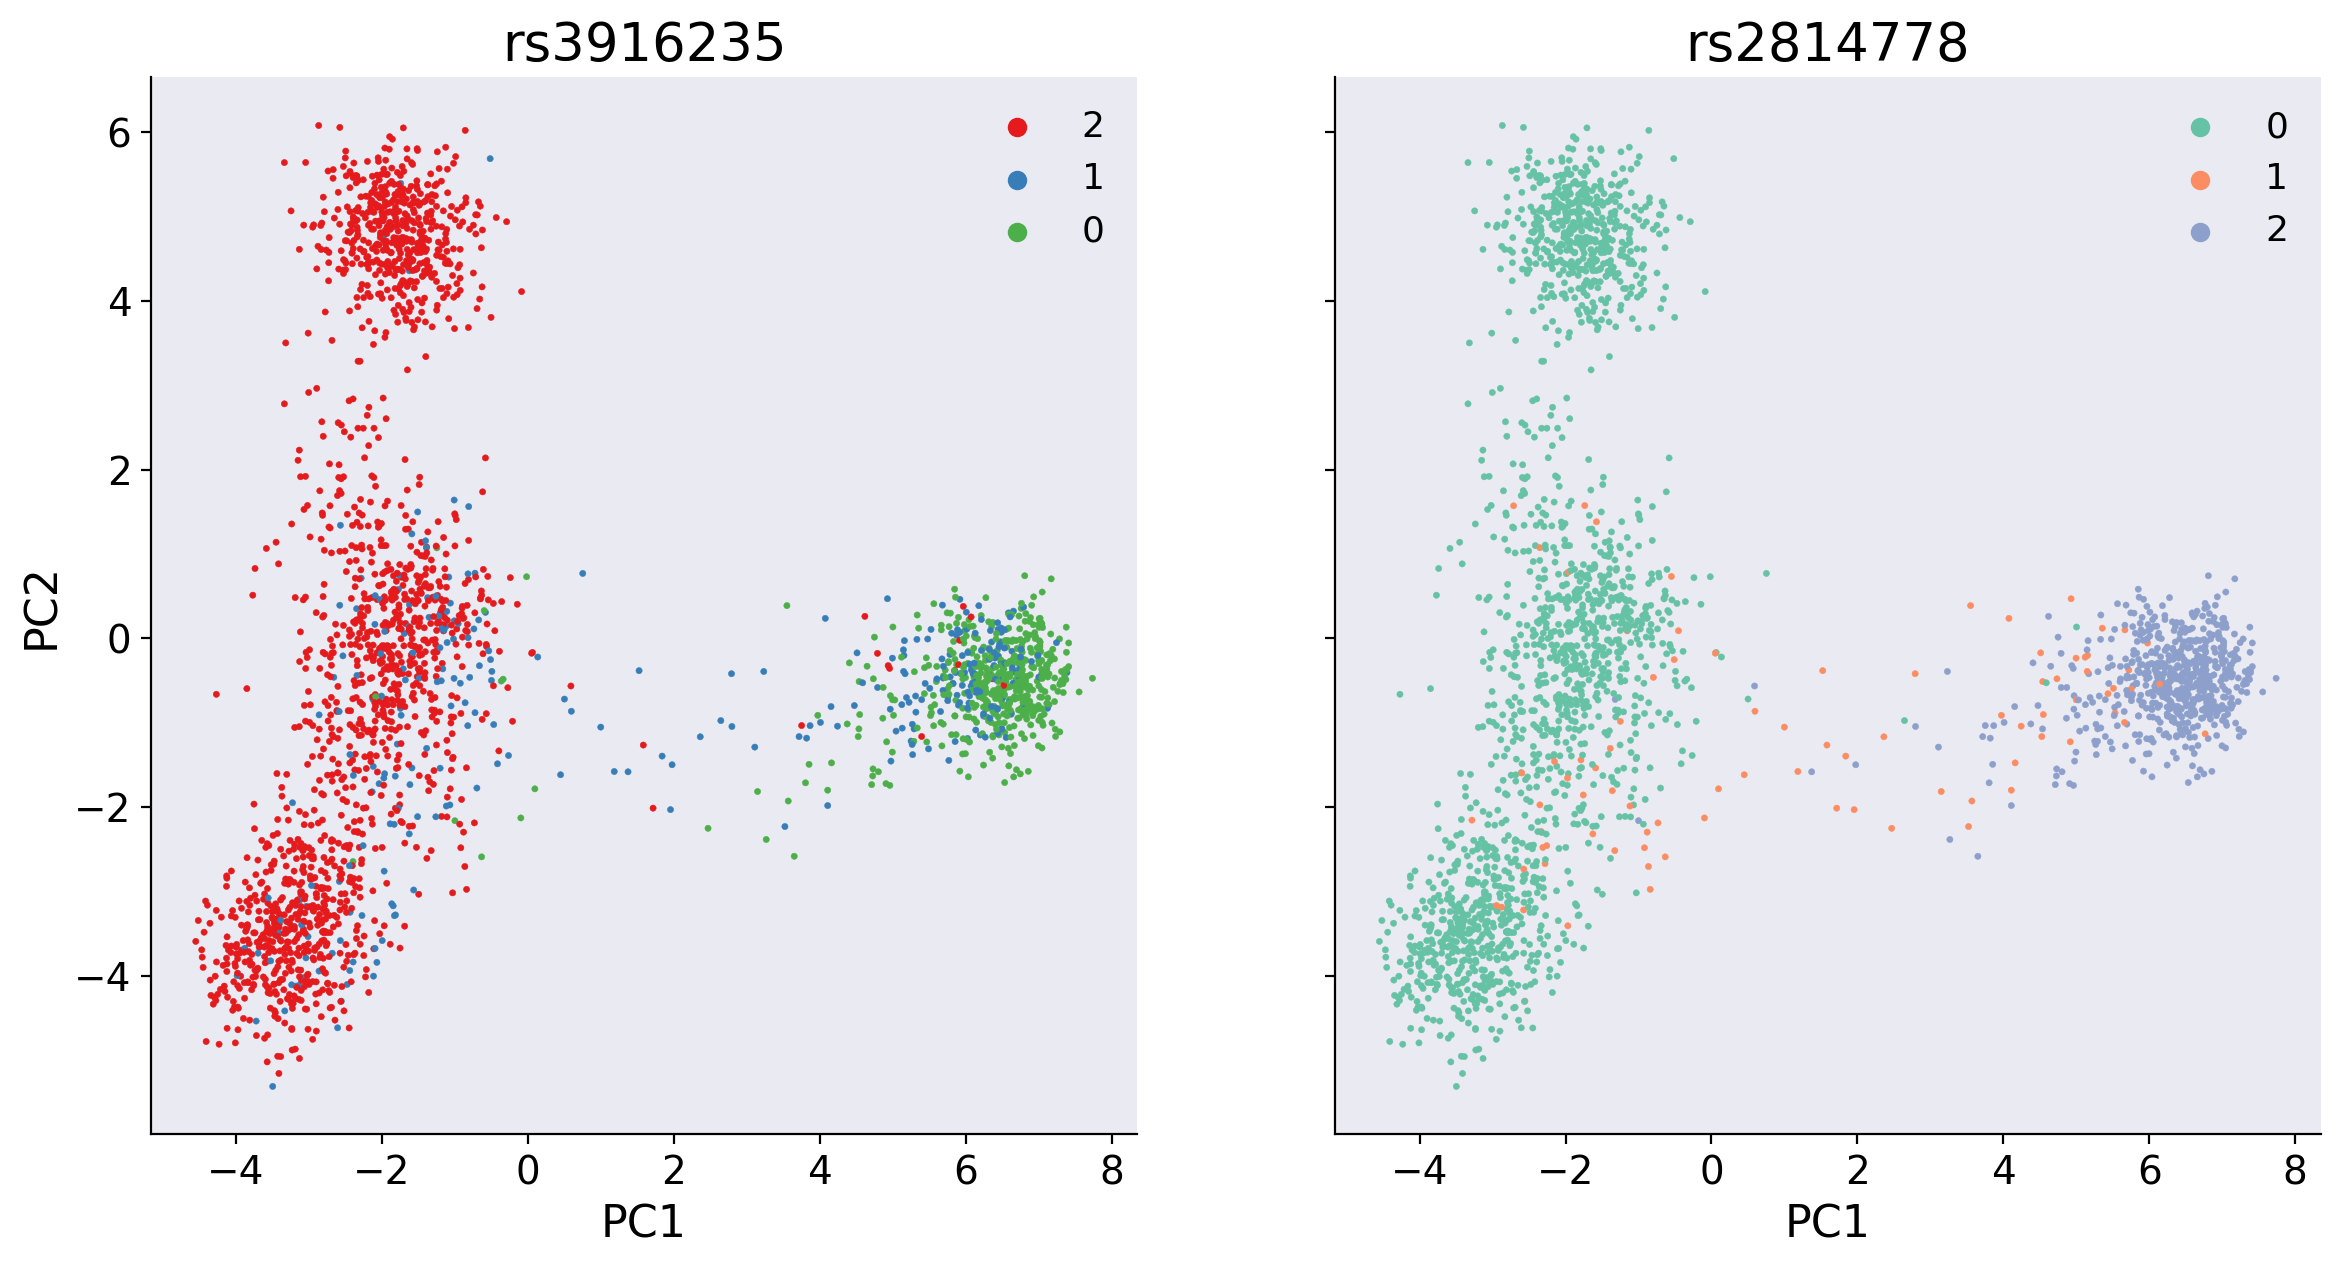

In [11]:
fig, axs = plt.subplots(figsize = (14,7), ncols=2, sharex=True, sharey=True)

sns.scatterplot(data = phase3_info, x = 'PC1', y = 'PC2', hue = 'rs3916235',
                edgecolor = None, palette = 'Set1', s = 5, ax = axs[0])
sns.scatterplot(data = phase3_info, x = 'PC1', y = 'PC2', hue = 'rs2814778',
                edgecolor = None, palette = 'Set2', s = 5, ax = axs[1])

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(title='', frameon = False)

axs[0].set_title('rs3916235')
axs[1].set_title('rs2814778')
    
plt.savefig('PCA_by_SNPs.pdf', bbox_inches = 'tight')

In [14]:
# we could also use tSNE to have a look

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
            random_state=42,
            init='pca',
            verbose=1).fit_transform(phase3_genotype.T)

phase3_info['tSNE_1'] = tsne[:, 0]
phase3_info['tSNE_2'] = tsne[:, 1]

/Users/xichen/miniconda3/envs/scs/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/xichen/miniconda3/envs/scs/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2504 samples in 0.000s...
[t-SNE] Computed neighbors for 2504 samples in 0.139s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2504
[t-SNE] Computed conditional probabilities for sample 2000 / 2504
[t-SNE] Computed conditional probabilities for sample 2504 / 2504
[t-SNE] Mean sigma: 2.164615
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.671860
[t-SNE] KL divergence after 1000 iterations: 2.307062


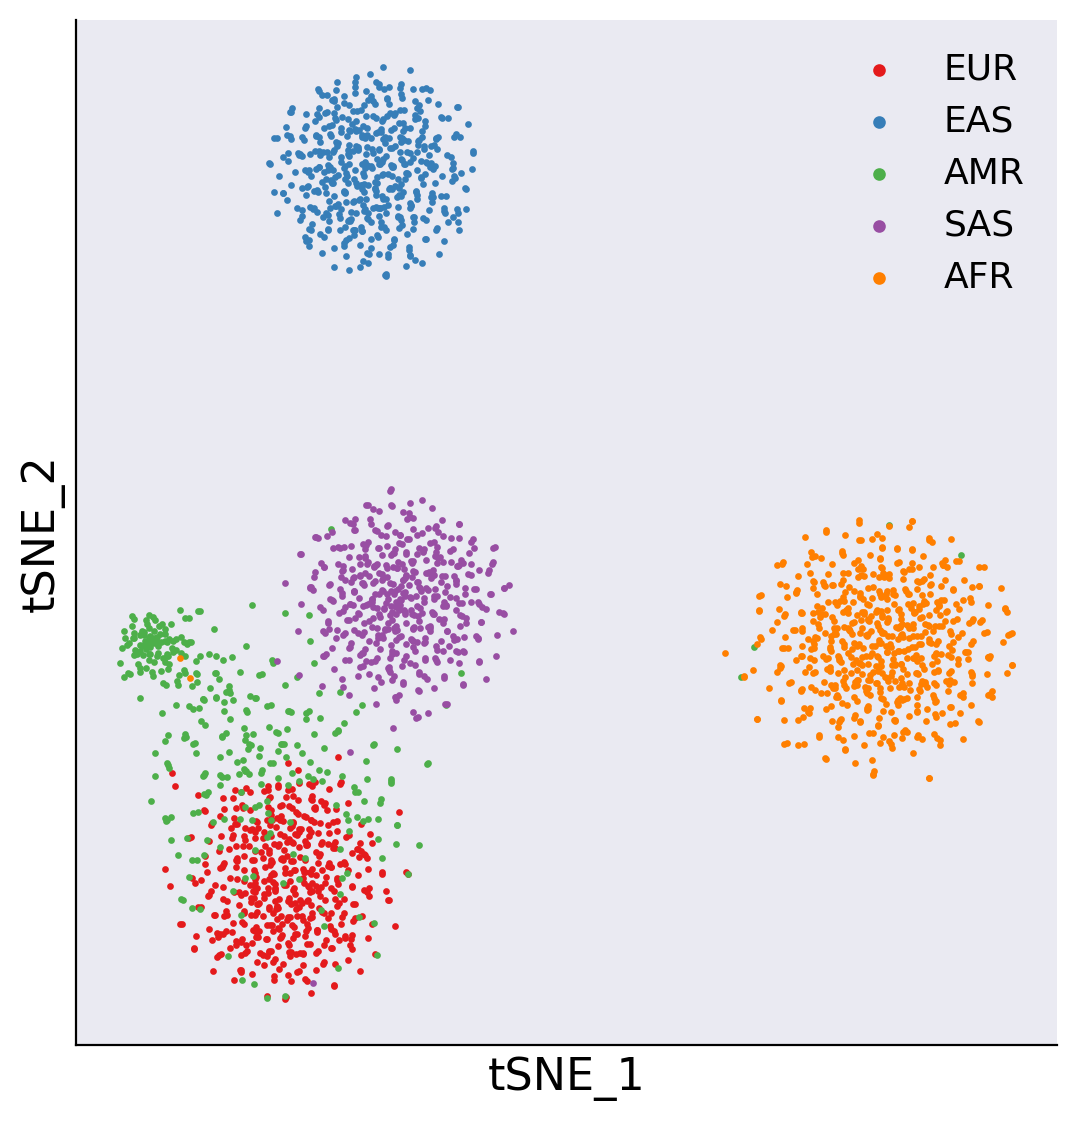

In [15]:
g = sns.FacetGrid(phase3_info, hue='super_pop', height=6, palette='Set1')
g.map(plt.scatter, 'tSNE_1', 'tSNE_2', s=2, rasterized=True)

g.ax.tick_params(left=False, bottom=False)
g.ax.set_xticks([])
g.ax.set_yticks([])

g.ax.legend(frameon = False, markerscale=2.5)
plt.show()

__With the data we have, we actually can do more interesting things. One obvoius thing to ask is: If we get data from new individuals, can we guess which populations they are from? For the sake of practice and demonstration, let's build some machine learning model for the prediciton.__

__First, we have some data from phase1 1000 Genome Project, and some of them are only in phase 1. Therefore, we could use the data above (phase 3) to train a model, then predict the superpopulation of the phase 1 individuals.__

In [16]:
# load the data

phase1_genotype = pd.read_csv('1kg_phase1_MGI358_genotype_matrix.tsv', sep = '\t', index_col = 0)
phase1_info = pd.read_csv('individuals_only_in_phase1_release_20101123.txt', sep = '\t', index_col = 0)
phase1_info = phase1_info.loc[phase1_genotype.columns, :]

# All ASN individuals in phase1 are Chinese, so we rename them to be consistent
phase1_info.replace({'super_pop' : {'ASN' : 'EAS'}}, inplace = True)

In [17]:
all_genotype = pd.concat([phase3_genotype, phase1_genotype], axis = 1, join = 'outer')
all_genotype.fillna(0, inplace = True)

In [18]:
X_train = all_genotype.loc[:, phase3_genotype.columns].T
Y_train = phase3_info['super_pop']
X = all_genotype.loc[:, phase1_genotype.columns].T

In [19]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty='l2',
                           random_state=42,
                           solver='liblinear')
logit.fit(X_train, Y_train)

LogisticRegression(random_state=42, solver='liblinear')

# Now Let's make some plots and prediction

In [20]:
out = pd.DataFrame(data=logit.predict(X),
                   index=phase1_info.index,
                   columns=['predicted_super_pop'])
out['predicted_proba'] = logit.predict_proba(X).max(1)
sorted_idx = out.sort_values(by=['predicted_super_pop', 'predicted_proba']).index
y_prob = logit.predict_proba(X.loc[sorted_idx])

In [21]:
phase1_info['hm_color'] = phase1_info['super_pop']
phase1_info.replace({'hm_color' : {'EUR' : '#e41a1b',
                                   'EAS' : '#377eb8',
                                   'SAS' : '#984ea2',
                                   'AMR' : '#4eaf4a',
                                   'AFR' : '#ff7f00'
                                   }}, inplace = True)

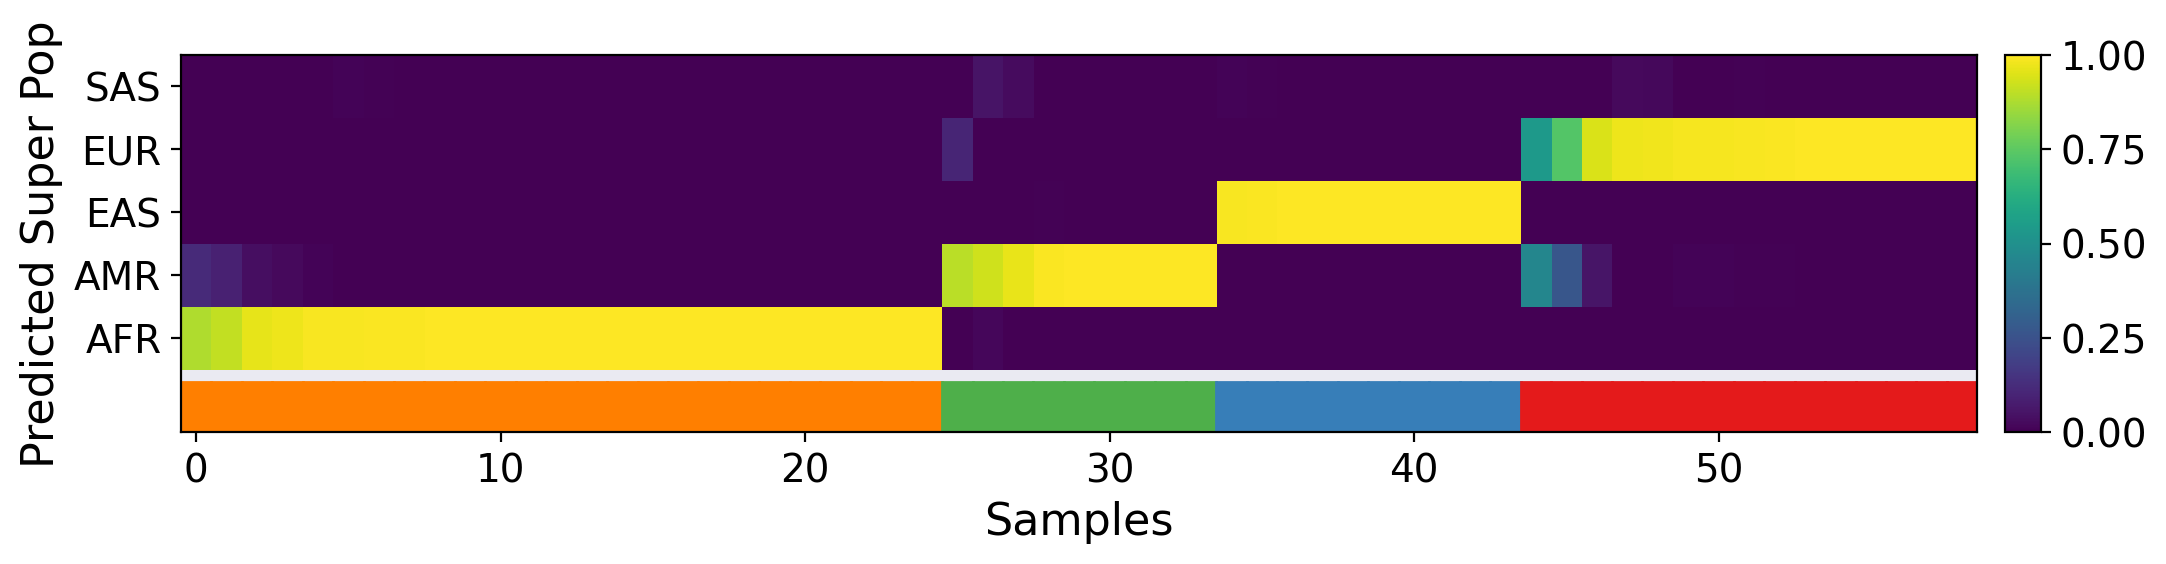

In [22]:
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(12,2.5), ncols=2, gridspec_kw={'width_ratios' : [50,1], 'wspace' : 0.03})

hm = ax[0].imshow(y_prob.T, cmap='viridis', vmin=0, vmax=1, aspect='auto', interpolation='nearest')
ax[0].set_yticks(range(5))
ax[0].set_yticklabels(logit.classes_)
ax[0].set_xlabel('Samples')
ax[0].set_ylabel('Predicted Super Pop')
ax[0].set_ylim(-1.5, 4.5)
for i,j in enumerate(sorted_idx):
    ax[0].add_patch(Rectangle((i-0.5,-1.5), 1, 0.8, fill=True, color=phase1_info.loc[j, 'hm_color'], edgecolor=None))
cb = plt.colorbar(hm, cax=ax[1])
cb.ax.set_xlabel('')
plt.show()

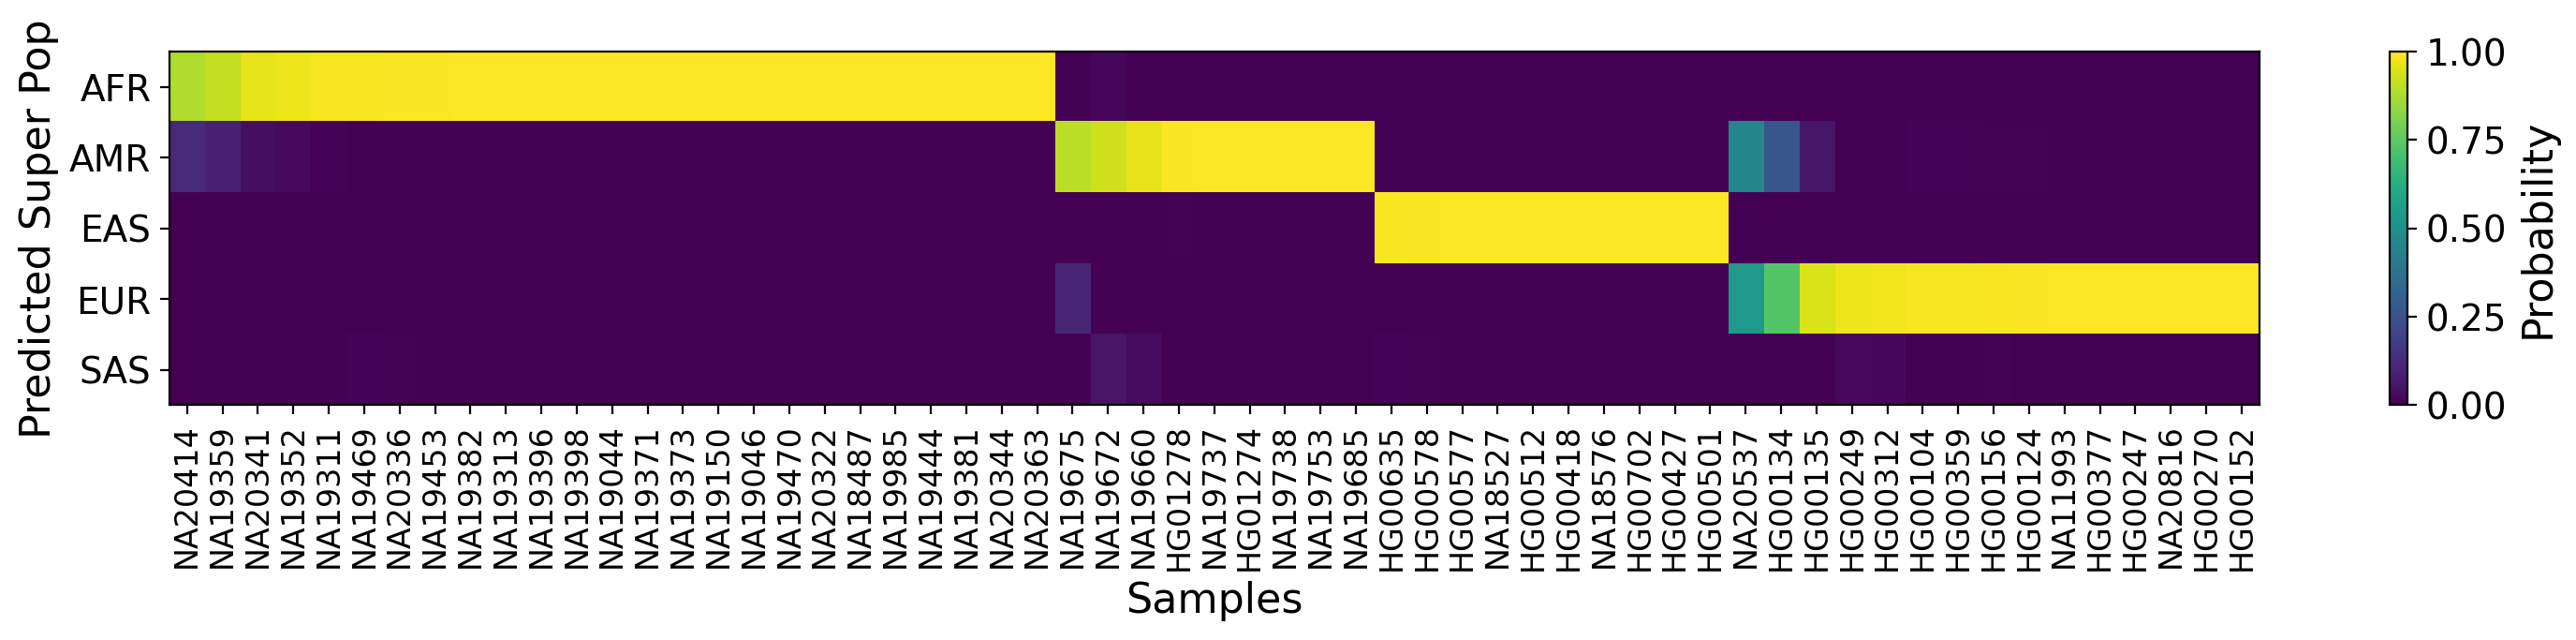

In [23]:
fig, ax = plt.subplots(figsize=(18,2.5))

hm = ax.imshow(y_prob.T, cmap='viridis', vmin=0, vmax=1, aspect='auto')
ax.set_yticks(range(5))
ax.set_yticklabels(logit.classes_)
ax.set_xticks(range(59))
ax.set_xticklabels(sorted_idx, rotation = 90, fontsize=12)
ax.set_xlabel('Samples')
ax.set_ylabel('Predicted Super Pop')
cb = plt.colorbar(hm)
cb.ax.set_ylabel("Probability")
plt.show()

# Practice

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# do it yourself